Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Note that in code sections, you must replace `stop("Not Implemented")` with your code. Otherwise, you will have points automatically deducted in the grading process.

**Please do not rename this file.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER/EXPLANATION HERE". In addition, please do not include your name on this assignment to ensure anonymity for the peer reviews.

---

# Problem 1

Take a look at the `SleepStudy` data within the `Lock5Data` package. The goal in this exercise will be to create a model to predict student GPAs. As an exploratory data analysis tool create a pairwise scatterplot (page 23 of lecture 9) to see whether there are any patterns visible between the following variables: 

- GPA 
- Gender 
- ClassYear 
- CognitionZscore 
- DepressionScore 
- AnxietyScore 
- StressScore 
- Drinks 
- WeekdaySleep 
- WeekendRise

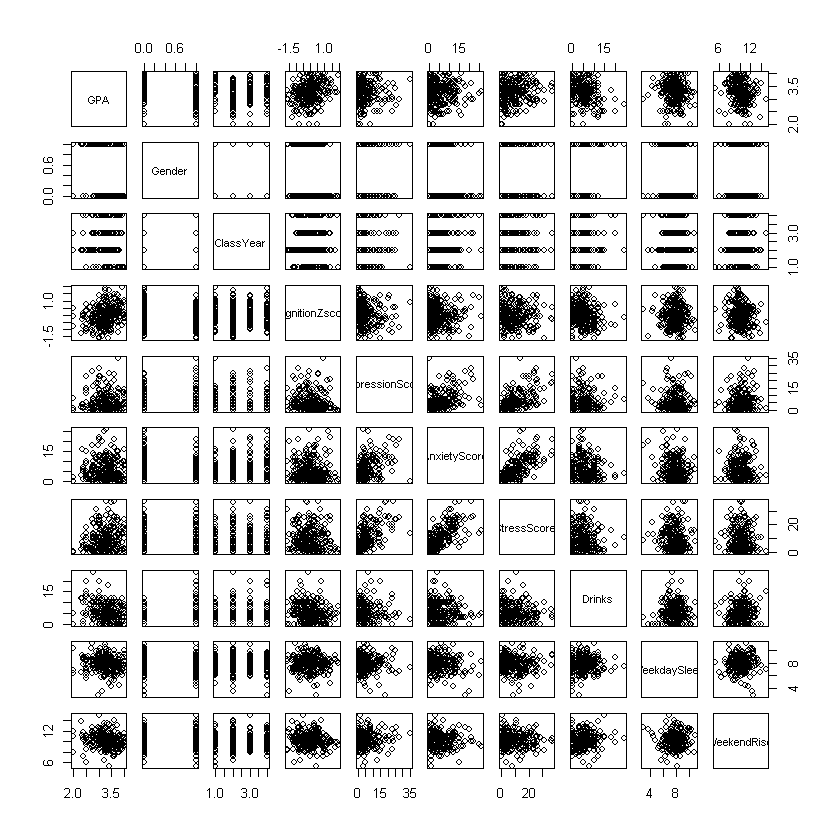

In [4]:
library(Lock5Data)
data("SleepStudy")
pairs(~ GPA + Gender + ClassYear + CognitionZscore + DepressionScore + AnxietyScore + StressScore + Drinks + WeekdaySleep + WeekendRise, data = SleepStudy)


Next, create a plot to compare the effects of treating the `ClassYear` variable as a continuous or a categorical predictor of `GPA`. Hint: You will need to complete at least one very basic linear model to create the lines necessary in the plot. Be sure to include a title, clear labels, and context information!

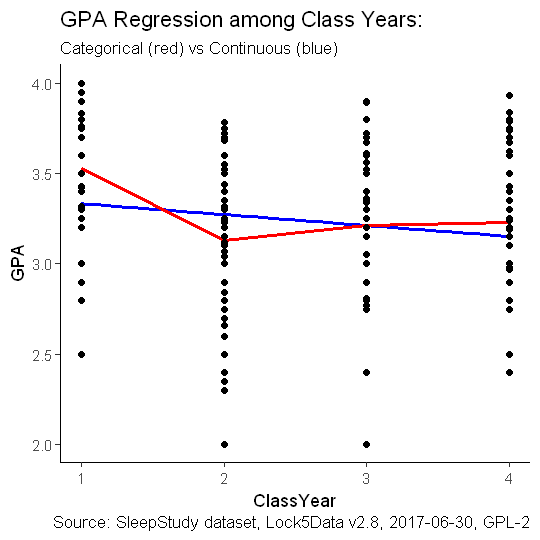

In [119]:
fit2 <- lm(GPA ~ factor(ClassYear), data = SleepStudy)
fit2_line <- aggregate(fit2$fitted.values ~ SleepStudy$ClassYear, FUN = mean)
colnames(fit2_line) <- c('ClassYear','GPA')

options(repr.plot.width=4.5, repr.plot.height=4.5)
library(ggplot2)
ggplot(data=SleepStudy, aes(y = GPA,x = ClassYear)) +
    geom_smooth(data=SleepStudy, method='lm', formula=y~x, se=FALSE, col='blue', size=1)+
    geom_line(data=fit2_line, aes(x=ClassYear, y=GPA), col='red', size=1) + 
    geom_point(data=SleepStudy, aes(x=ClassYear, y=GPA)) +
    labs(title = "GPA Regression among Class Years:",
         subtitle = "Categorical (red) vs Continuous (blue)",
         caption = "Source: SleepStudy dataset, Lock5Data v2.8, 2017-06-30, GPL-2") +
theme_classic()

Following the steps used in the lecture, fit a model to predict a student's GPA. Include any intermediate steps in R that you take, explained with short comments in your code. Exploring interaction terms is encouraged, but not required.

In [26]:
my_fit <- lm(GPA ~ CognitionZscore + StressScore + Drinks, data=SleepStudy)
#student 1: smart stressed hidrinker
#student 2: midsmart unstressed nondrinker
#student 3: midsmart midstress middrinker
xn <- data.frame( CognitionZscore=c(1, 0, 0), StressScore=c(25, 0, 8), Drinks=c(15, 0, 8))
pred <- predict(my_fit, xn, se.fit=TRUE)
pred

$fit
       1        2        3 
3.342126 3.266229 3.178617 

$se.fit
         1          2          3 
0.09109166 0.05104466 0.02746897 

$df
[1] 249

$residual.scale
[1] 0.3724102

Make a plot of the four residual analysis plots to make sure the regression does not violate any assumptions in a major way.

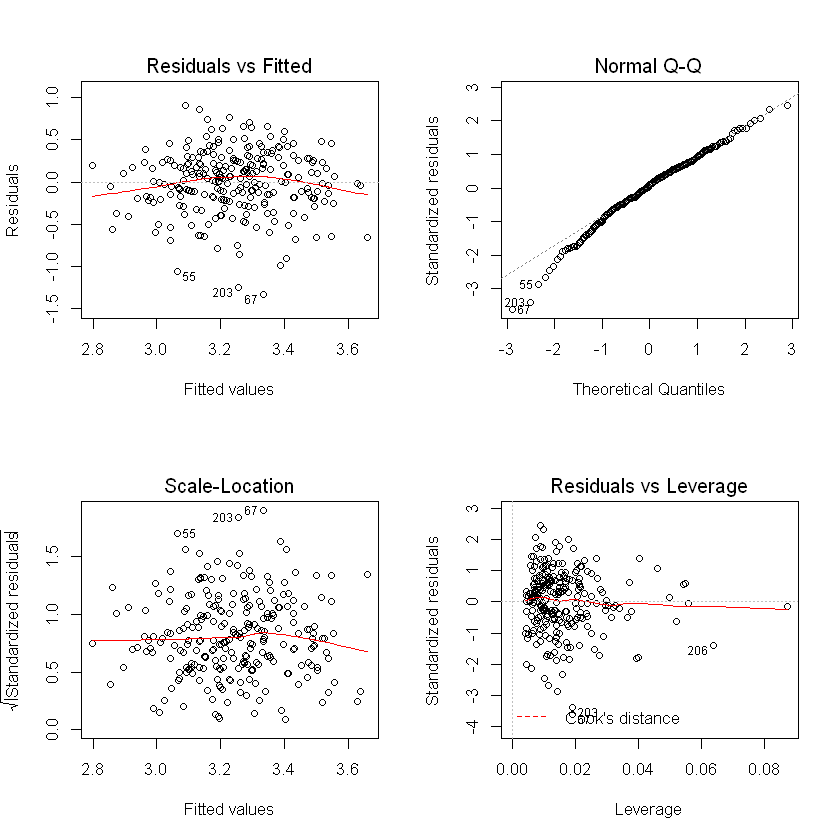

In [29]:
par(mfrow=c(2,2)) # 2x2 panel layout
plot(my_fit)

Comment briefly on the residual analysis.

#### Residulas vs Fitted (upper left):
A slight (and I mean very slight) parabolic relationship exists in the residuals, and thus is not explained in a linear regression.  However, the degree of change on the y-axis shows relatively small changes in residual
#### Q-Q Plot (upper right):
Q-Q plot tracks well with the diagonal (suggesting residuals are normally-distributed), with the exception of a heavy left tail.  These large values are most likely due to extreme lows of the GPA distribution.
#### Scale-Location (lower left):
Residuals appear to be randomly spread among fitted values, suggesting that there is equal variance among fitted values. The flat slope of the trend line shows that residuals don't vary much with increasing fitted values.
#### Residuals vs Leverage (lower right):
Small leverage values and lack of Cook's distance lines indicate the lack of any outlying cases influencing the regression.

#### Summary
Overall, the plots suggest that our model may represent a good fit of the features that determine GPA.

##### Extra Resources:  http://data.library.virginia.edu/diagnostic-plots/

---

# Problem 2

The `NutritionStudy` data set within the `Lock5Data` package contains information on the health and nutrition of 315 individuals. The purpose in this problem is to use this data to model `Quetelet`, a variable defined as follows:

$$\text{Quetelet} = \frac{\text{Weight}}{\text{Height}^2}$$

The 19th century Statistician Adolphe Quetelet developed the idea that one's height should be used to determine an ideal weight. This is now recognized as the body mass index (BMI). First, consider the variable `PriorSmoke`, which takes one of three values:

Value | Meaning
----- | --------------
1     | Never smoked
2     | Used to smoke
3     | Still smoke

Since this is an ordered scale, this could be treated as a continuous variable, but could also be treated as a categorical variable (factor). Create a plot to show the fitted line for using the `PriorSmoke` variable to model `Quetelet` as both a continuous variable and a categorical variable. Don't forget to include a title, legend, axis labels, ad context information!

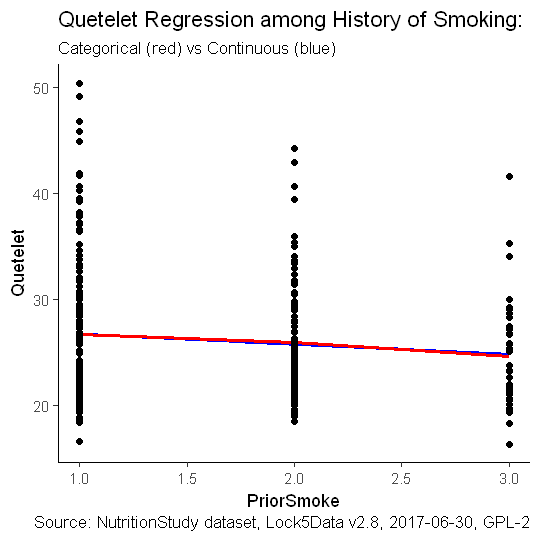

In [120]:
library(Lock5Data)
data("NutritionStudy")

fit2 <- lm(Quetelet ~ factor(PriorSmoke), data = NutritionStudy)
fit2_line <- aggregate(fit2$fitted.values ~ NutritionStudy$PriorSmoke, FUN = mean)
colnames(fit2_line) <- c('PriorSmoke','Quetelet')

options(repr.plot.width=4.5, repr.plot.height=4.5)
library(ggplot2)
ggplot(data=NutritionStudy, aes(y = Quetelet,x = PriorSmoke)) +
    geom_smooth(data=NutritionStudy, method='lm', formula=y~x, se=FALSE, col='blue', size=1)+
    geom_line(data=fit2_line, aes(x=PriorSmoke, y=Quetelet), col='red', size=1) + 
    geom_point(data=NutritionStudy, aes(x=PriorSmoke, y=Quetelet)) +
    labs(title = "Quetelet Regression among History of Smoking:",
         subtitle = "Categorical (red) vs Continuous (blue)",
         caption = "Source: NutritionStudy dataset, Lock5Data v2.8, 2017-06-30, GPL-2") +
theme_classic()

Next, fit a model for `Quetelet` with the following predictors:

- `Cholesterol`
- `PriorSmoke` (either as a continuous or categorical variable, based on your answer above)
- `BetaPlasma`
- `Gender`
- An interaction between `Gender` and `PriorSmoke`

Name the linear model object `first_lm` and include a summary of the model output.

In [130]:
first_lm <- lm(Quetelet ~ Cholesterol + PriorSmoke + BetaPlasma + Gender + Gender:PriorSmoke, data=NutritionStudy)
summary(first_lm)


Call:
lm(formula = Quetelet ~ Cholesterol + PriorSmoke + BetaPlasma + 
    Gender + Gender:PriorSmoke, data = NutritionStudy)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.554  -4.210  -1.129   3.020  22.333 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           29.197461   1.149597  25.398  < 2e-16 ***
Cholesterol            0.004314   0.002596   1.662  0.09760 .  
PriorSmoke            -1.550624   0.498175  -3.113  0.00203 ** 
BetaPlasma            -0.007945   0.001816  -4.375 1.67e-05 ***
GenderMale            -3.951574   2.756809  -1.433  0.15276    
PriorSmoke:GenderMale  1.976515   1.419836   1.392  0.16490    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.785 on 309 degrees of freedom
Multiple R-squared:  0.08924,	Adjusted R-squared:  0.0745 
F-statistic: 6.055 on 5 and 309 DF,  p-value: 2.296e-05


Use backward selection to produce a model with predictors that are all significant at an $\alpha$-level of 0.05. Name the final model `final_lm` and include a summary of the model object.

In [133]:
# began with features from above, and iteratively removed them if Pr(>|t|) > 0.05
final_lm <- lm(Quetelet ~ PriorSmoke + BetaPlasma, data = NutritionStudy)
summary(final_lm)


Call:
lm(formula = Quetelet ~ PriorSmoke + BetaPlasma, data = NutritionStudy)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.582  -4.145  -1.059   3.068  22.308 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.745776   0.935509   31.80  < 2e-16 ***
PriorSmoke  -1.241703   0.465026   -2.67  0.00798 ** 
BetaPlasma  -0.008186   0.001807   -4.53 8.39e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.806 on 312 degrees of freedom
Multiple R-squared:  0.07378,	Adjusted R-squared:  0.06785 
F-statistic: 12.43 on 2 and 312 DF,  p-value: 6.413e-06


---

# Problem 3

Use the American Community Survey (`ACS`) dataset in the `Lock5Data` package to perform an analysis of variance (ANOVA) to compare mean incomes in `Race` and `Sex` groups. Should the model include an interaction term? Begin by making an interaction plot to determine if the effect of being a different race affects the sexes differently. Don't forget to include a title, axis labels, legend, and context information. Some of the preliminary data management has been done for you.

In [2]:
library(Lock5Data)
data("ACS")
ACS$Sex <- factor(ACS$Sex, labels = c("Female","Male"))
sub_acs <- subset(ACS, select = c("Income","Sex","Race"))
sub_acs <- na.omit(sub_acs)

ggplot(data = sub_acs, aes(x = Race, color = Sex, group = Sex, y = Income)) +
    stat_summary(fun.y = mean, geom = "point") +
    stat_summary(fun.y = mean, geom = "line") + 
    labs(title = "Interaction of Race and Sex on Income",
         caption = "Source: ACS dataset, Lock5Data v2.8, 2017-06-30, GPL-2") +
    theme_classic() +
    theme(legend.position="top",legend.direction="horizontal") 
    

ERROR: Error in ggplot(data = sub_acs, aes(x = Race, color = Sex, group = Sex, : could not find function "ggplot"


Next, perform an ANOVA for `Income` with the `Sex` and `Race` variables. Include the interaction between the two variables in the model as well. If necessary, use backward selection (don't add any more variables) to produce a final model. Name the final model `final_lm` and include a summary of the model object. Use an $\alpha$-level of 0.05 to determine whether variables are statistically significant.

In [3]:
final_lm <- lm(Income ~ Race + Sex + Race:Sex, data=sub_acs)
summary(final_lm)
anova(final_lm)



Call:
lm(formula = Income ~ Race + Sex + Race:Sex, data = sub_acs)

Residuals:
   Min     1Q Median     3Q    Max 
-35.87 -16.68 -14.68   9.46 532.41 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)        20.5440     8.4865   2.421   0.0157 *
Raceblack          -4.0363    10.6274  -0.380   0.7042  
Raceother         -14.7815    12.1261  -1.219   0.2232  
Racewhite          -3.8653     8.7778  -0.440   0.6598  
SexMale            15.3303    11.1115   1.380   0.1681  
Raceblack:SexMale -12.0609    15.1225  -0.798   0.4254  
Raceother:SexMale   0.9507    16.6364   0.057   0.9544  
Racewhite:SexMale  -1.4142    11.6080  -0.122   0.9031  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 42.43 on 817 degrees of freedom
Multiple R-squared:  0.03024,	Adjusted R-squared:  0.02193 
F-statistic: 3.639 on 7 and 817 DF,  p-value: 0.0007105


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Race,3,8234.283,2744.7610,1.5244204,2.067133e-01
Sex,1,35685.418,35685.4177,19.8194223,9.693515e-06
Race:Sex,3,1946.273,648.7577,0.3603153,7.816887e-01
Residuals,817,1471031.082,1800.5276,NA,NA


Regardless of what your final model was above, conduct pairwise t-tests to see if any pairs of races have significantly different mean incomes. Use the Bonferroni correction on the p-values to adjust for multiple comparisons.

In [4]:
#thanks rui barradas for help to create iterative solution from my broken vectorized solution

race_unique <- unique(sub_acs$Race)
cbn <- t(combn(as.character(race_unique), 2))
pval <- numeric(nrow(cbn))
tstat <- numeric(nrow(cbn))

for(i in seq_len(nrow(cbn))){
    a <- subset(sub_acs, Race %in% cbn[i, ])
    tt <- t.test(Income ~ Race, data = a, p.adjust.methods = 'bonferroni')
    pval[i] <- tt$p.value
    tstat[i] <- tt$statistic
}

t_df <- data.frame(race1 = cbn[, 1], race2 = cbn[, 2], pval = pval, tstat = tstat)
t_df[order(t_df$tstat),]


# # OLD ONE-BY_ONE METHOD BELOW
# t_ri <- function(arr_x, arr_y) {
#     t.test(sub_acs[sub_acs$Race == arr_x,]$Income, 
#            sub_acs[sub_acs$Race == arr_y,]$Income, 
#            p.adjust.methods='bonferroni')
# }
# w_b <- t_ri('white', 'black')  
# w_a <- t_ri('white', 'asian')
# a_b <- t_ri('asian', 'black')

# paste('white', 'black', 't-stat: ', w_b$statistic, 'p-val: ', w_b$p.value,sep="\t")
# paste('white', 'asian', 't-stat: ', w_a$statistic, 'p-val: ', w_a$p.value,sep="\t")
# paste('asian', 'black', 't-stat: ', a_b$statistic, 'p-val: ', a_b$p.value,sep="\t")

,race1,race2,pval,tstat
2,white,other,0.007776557,-2.7231317
1,white,black,0.190337465,-1.3173942
4,black,other,0.365064209,0.9092968
3,white,asian,0.203332407,1.2831045
5,black,asian,0.050391428,1.9782605
6,other,asian,0.005943459,2.8158303


Are any significantly different from each other? How does this match up with your ANOVA outcome? Answer breifly in only a sentence or two.

Incomes of Asians and Others are significantly different, with a t_statistic of 2.8 (pval < 0.01), as seen in the interaction graph of their mean income.  This wasn't reflected in the anova results since the summary of that anaylsis did not compare the covariance between two particular races, as in the pairwise comparison of the t-test.